# **Import Libraries**

In [1]:
!pip install openpyxl
!pip install seaborn==0.11.0
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import openpyxl
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno
import warnings
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, recall_score, precision_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, recall_score, precision_score, classification_report
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier
warnings.filterwarnings("ignore")
#matplotlib inline
import re
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
 # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     |████████████████████████████████| 242 kB 797 kB/s            
     |████████████████████████████████| 283 kB 774 kB/s            
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
/kaggle/input/landslide-prediction-for-muzaffarabadpakistan/Complete-data.csv


# **EDA(Exploratory Data Analysis)**

In [2]:
LS_df = pd.read_csv("../input/landslide-prediction-for-muzaffarabadpakistan/Complete-data.csv")

In [3]:
LS_df.head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,0,3,3,2,2,2,1,4,2,2,3,3,2
1,0,1,5,2,3,1,1,4,2,5,5,2,2
2,0,3,4,3,2,2,4,3,2,4,5,2,2
3,0,1,3,3,3,5,1,2,4,3,5,3,3
4,0,5,4,2,1,4,1,2,4,3,3,1,4


In [4]:
LS_df.tail()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
1207,1,4,2,1,4,2,5,1,5,3,2,4,2
1208,1,4,5,1,5,3,5,1,5,5,2,1,5
1209,1,3,4,1,5,2,5,2,3,3,2,2,5
1210,1,2,2,1,3,1,1,5,1,1,1,3,3
1211,1,3,4,1,3,2,1,4,1,4,1,2,3


In [5]:
print( 'Shape of DataFrame: {}'.format(LS_df.shape))

Shape of DataFrame: (1212, 13)


In [6]:
print (LS_df.loc[350])

Landslide        0
Aspect           1
Curvature        3
Earthquake       3
Elevation        3
Flow             1
Lithology        4
NDVI             2
NDWI             3
Plan             3
Precipitation    5
Profile          4
Slope            2
Name: 350, dtype: int64


In [7]:
numerical=LS_df.select_dtypes('number').columns
categorical = LS_df.select_dtypes('object').columns
print(f'Numerical Columns:  {LS_df[numerical].columns}')
print(f'Categorical Columns: {LS_df[categorical].columns}')

Numerical Columns:  Index(['Landslide', 'Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow',
       'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile',
       'Slope'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


In [8]:
LS_df.columns

Index(['Landslide', 'Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow',
       'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile',
       'Slope'],
      dtype='object')

In [9]:
print(LS_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Landslide      1212 non-null   int64
 1   Aspect         1212 non-null   int64
 2   Curvature      1212 non-null   int64
 3   Earthquake     1212 non-null   int64
 4   Elevation      1212 non-null   int64
 5   Flow           1212 non-null   int64
 6   Lithology      1212 non-null   int64
 7   NDVI           1212 non-null   int64
 8   NDWI           1212 non-null   int64
 9   Plan           1212 non-null   int64
 10  Precipitation  1212 non-null   int64
 11  Profile        1212 non-null   int64
 12  Slope          1212 non-null   int64
dtypes: int64(13)
memory usage: 123.2 KB
None


In [10]:
LS_df.count()

Landslide        1212
Aspect           1212
Curvature        1212
Earthquake       1212
Elevation        1212
Flow             1212
Lithology        1212
NDVI             1212
NDWI             1212
Plan             1212
Precipitation    1212
Profile          1212
Slope            1212
dtype: int64

In [11]:
LS_df.describe()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,0.500000,2.962046,2.977723,2.102310,2.436469,2.338284,1.948845,3.042904,2.773927,3.059406,3.813531,3.262376,2.811881
std,0.500206,1.147378,1.099658,0.669812,1.242686,1.112686,1.424345,1.239246,1.299830,1.057287,1.347799,1.039502,1.194229
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,0.500000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
75%,1.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000
max,1.000000,5.000000,5.000000,3.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [12]:
LS_df.corr()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
Landslide,1.000000,-0.008633,-0.173393,0.187313,-0.168049,-0.261124,-0.120538,0.111900,-0.194317,-0.103052,0.280490,0.169928,0.123029
Aspect,-0.008633,1.000000,-0.024232,0.014727,0.017998,0.024295,0.025086,-0.158561,0.168099,-0.043066,-0.010454,-0.015876,0.048420
Curvature,-0.173393,-0.024232,1.000000,-0.049595,0.193843,0.025736,0.058319,0.094625,-0.089028,0.815075,-0.104207,-0.806851,0.143316
Earthquake,0.187313,0.014727,-0.049595,1.000000,0.071308,0.003382,0.095507,-0.134619,0.118588,-0.022582,0.825169,0.049177,0.055050
Elevation,-0.168049,0.017998,0.193843,0.071308,1.000000,0.026903,0.429702,-0.217003,0.187921,0.104691,-0.003628,-0.228721,0.333029
Flow,-0.261124,0.024295,0.025736,0.003382,0.026903,1.000000,-0.033881,-0.393805,0.462291,0.041163,0.002451,-0.011119,-0.078842
Lithology,-0.120538,0.025086,0.058319,0.095507,0.429702,-0.033881,1.000000,-0.129279,0.119080,0.008051,0.005351,-0.048930,0.169103
NDVI,0.111900,-0.158561,0.094625,-0.134619,-0.217003,-0.393805,-0.129279,1.000000,-0.931590,0.102043,-0.096063,-0.042720,0.041726
NDWI,-0.194317,0.168099,-0.089028,0.118588,0.187921,0.462291,0.119080,-0.931590,1.000000,-0.097774,0.078201,0.040269,-0.098171
Plan,-0.103052,-0.043066,0.815075,-0.022582,0.104691,0.041163,0.008051,0.102043,-0.097774,1.000000,-0.072768,-0.487539,0.055292


In [13]:
LS_df.sort_values(by="Landslide", ascending=True)

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,0,3,3,2,2,2,1,4,2,2,3,3,2
400,0,1,5,2,2,5,1,4,2,5,5,1,4
401,0,4,3,1,4,3,1,3,3,3,2,3,2
402,0,3,2,1,2,2,1,4,1,3,1,4,2
403,0,2,5,1,1,1,3,5,1,4,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,1,4,2,3,2,3,4,3,3,2,5,4,4
809,1,3,3,2,1,2,1,4,1,4,4,4,5
810,1,3,3,2,1,2,1,4,2,4,3,4,1
812,1,3,3,2,1,1,1,5,1,3,3,3,3


In [14]:
LS_df.sort_values(by="Landslide", ascending=False).head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
606,1,1,3,2,2,5,1,4,2,3,5,3,3
814,1,4,1,2,1,2,1,3,3,1,5,4,1
812,1,3,3,2,1,1,1,5,1,3,3,3,3
811,1,3,4,2,1,2,1,4,2,3,5,2,5
810,1,3,3,2,1,2,1,4,2,4,3,4,1


In [15]:
LS_df.isna().sum()

Landslide        0
Aspect           0
Curvature        0
Earthquake       0
Elevation        0
Flow             0
Lithology        0
NDVI             0
NDWI             0
Plan             0
Precipitation    0
Profile          0
Slope            0
dtype: int64

In [16]:
LS_df.isna()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,False,False,False,False,False,False,False,False,False,False,False,False,False
1208,False,False,False,False,False,False,False,False,False,False,False,False,False
1209,False,False,False,False,False,False,False,False,False,False,False,False,False
1210,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
 df = LS_df.loc[100:250]
df[['Landslide', 'Curvature' , 'Earthquake']]

,Landslide,Curvature,Earthquake
100,0,5,1
101,0,5,3
102,0,4,1
103,0,4,1
104,0,3,1
...,...,...,...
246,0,4,2
247,0,4,2
248,0,4,1
249,0,3,1


In [18]:
# Analysing Earthquake
LS_df["Earthquake"].value_counts()

2    656
3    340
1    216
Name: Earthquake, dtype: int64

In [19]:
#Find the duplicates
LS_df.duplicated().sum()

14

In [20]:
#unique values
 
LS_df['Flow'].unique()
 
LS_df['Plan'].unique()
 
LS_df['Slope'].unique()

array([2, 3, 4, 1, 5])

In [21]:
#Filter data
df[LS_df['Profile']==4].head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
109,0,2,1,3,2,1,4,2,4,1,5,4,1
110,0,5,2,2,1,3,1,3,3,2,3,4,2
115,0,2,3,3,4,1,6,4,2,3,5,4,4
121,0,2,2,1,1,1,1,3,2,3,1,4,1
122,0,1,2,2,1,5,1,4,2,3,2,4,3


In [22]:
dis_features = [feature for feature in LS_df.columns if len(LS_df[feature].unique()) < 20 ]
print(dis_features)

['Landslide', 'Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow', 'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile', 'Slope']


Data Visualization

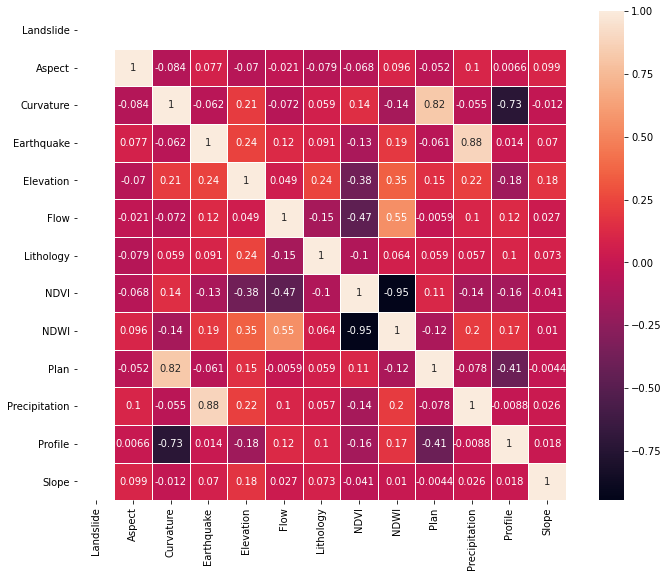

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
corr = df.corr( method = 'spearman')
sns.heatmap(corr, annot=True, square=True ,linewidths=.5)
plt.yticks(rotation=0)
plt.show()

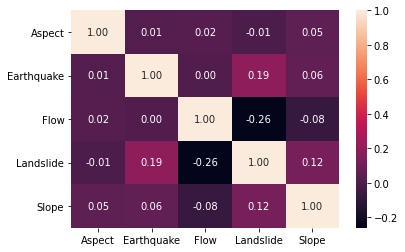

In [24]:
list1 = ['Aspect', 'Earthquake', 'Flow', 'Landslide', 'Slope']
sns.heatmap(LS_df[list1].corr(), annot = True, fmt = '.2f')
plt.show()


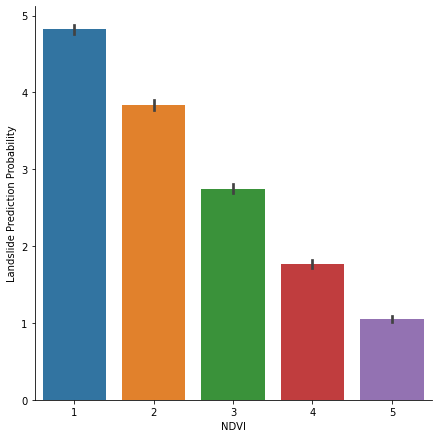

In [25]:
g = sns.factorplot(x = 'NDVI', y = 'NDWI', data = LS_df, kind = 'bar', size = 6)
g.set_ylabels('Landslide Prediction Probability')
plt.show()

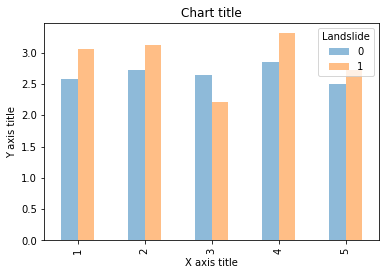

In [26]:
df_pivot = pd.pivot_table(LS_df, values="Slope",index="Flow",columns="Landslide", aggfunc=np.mean)
#Creating a grouped bar chart
ax = df_pivot.plot(kind="bar",alpha=0.5)
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
# Show the plot
plt.show()

<AxesSubplot:xlabel='Aspect', ylabel='Curvature'>

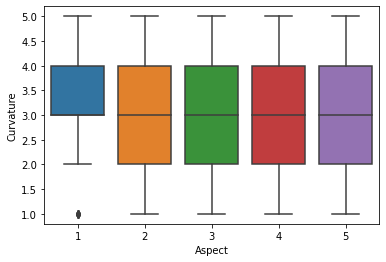

In [27]:
sns.boxplot(x="Aspect", y="Curvature", data=LS_df)

<AxesSubplot:xlabel='Aspect', ylabel='Profile'>

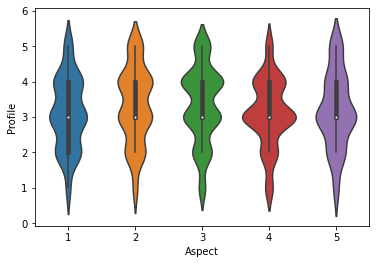

In [28]:
sns.violinplot(x="Aspect", y="Profile", data= LS_df, size=6)

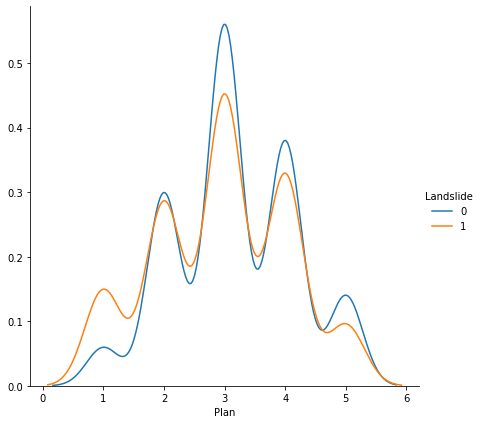

In [29]:
sns.FacetGrid(LS_df, hue="Landslide", size=6) \
   .map(sns.kdeplot, "Plan") \
   .add_legend()

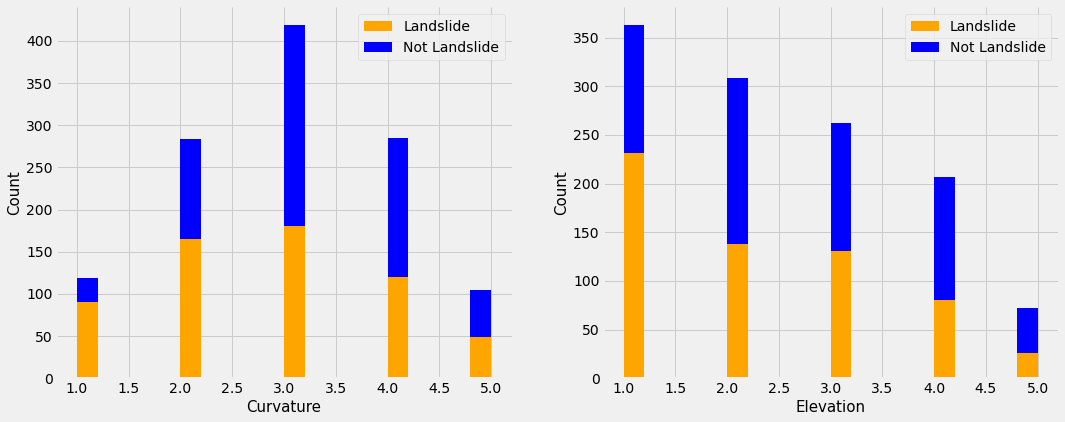

In [30]:
num_features = ['Curvature', 'Elevation']
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16, 14))
for i, feature in enumerate(num_features):
    plt.subplot(2, 2, i+1)
    plt.hist(x=[LS_df[feature][LS_df['Landslide'] == 1], LS_df[feature][LS_df['Landslide']==0]],
            stacked=True, label=['Landslide', 'Not Landslide'], bins=20, color=['orange', 'b'])
    plt.legend()
    plt.xlabel(f'{feature}', fontsize=15)
    plt.ylabel('Count', fontsize=15)


sns.despine()

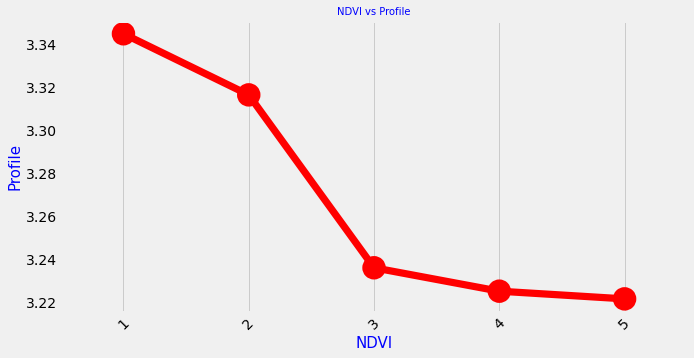

In [31]:
NDVI_unique=sorted(LS_df.NDVI.unique())
NDVI_Profile_values=LS_df.groupby('NDVI')['Profile'].count().values
mean_Profile=[]
for i,NDVI in enumerate(NDVI_unique):
    mean_Profile.append(sum(LS_df[LS_df['NDVI']==NDVI].Profile)/NDVI_Profile_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=NDVI_unique,y=mean_Profile,color='red',alpha=0.8)
plt.xlabel('NDVI',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Profile',fontsize = 15,color='blue')
plt.title('NDVI vs Profile',fontsize = 10,color='blue')
plt.grid()
plt.show()

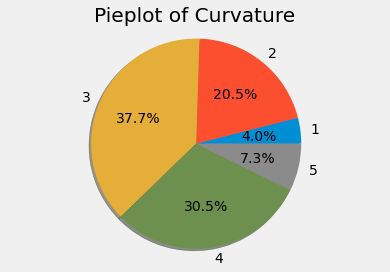

<Figure size 432x288 with 0 Axes>

In [32]:
labels = df['Curvature'].astype('category').cat.categories.tolist()
counts = df['Curvature'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.title('Pieplot of Curvature')
plt.show()

plt.savefig('pie3.eps', format='eps')

# **Feature Selection**

In [33]:
print('Featured hights correlation with survival')
print('Feature\tCorrelation')
Landslide_Corr = LS_df.corr()["Landslide"]
Landslide_Corr = Landslide_Corr[1:9] # remove the 'Survived'
Landslide_Corr= Landslide_Corr[np.argsort(Landslide_Corr, axis = 0)[::-1]] #sort in descending order
print(Landslide_Corr)

Featured hights correlation with survival
Feature	Correlation
Earthquake    0.187313
NDVI          0.111900
Aspect       -0.008633
Lithology    -0.120538
Elevation    -0.168049
Curvature    -0.173393
NDWI         -0.194317
Flow         -0.261124
Name: Landslide, dtype: float64


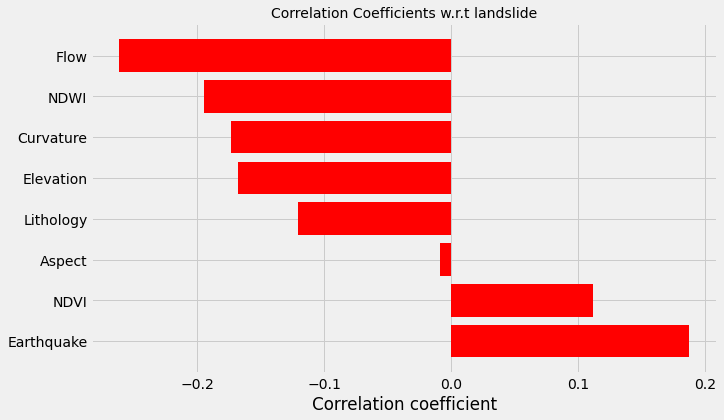

In [34]:
# Plot the top correlationin a bar chart for east visualisation.
width = 0
fig, ax = plt.subplots(figsize = (10,6))
rects = ax.barh(np.arange(len(Landslide_Corr)), np.array(Landslide_Corr.values), color = 'red')
ax.set_yticks(np.arange(len(Landslide_Corr)) + ((width)/1))
ax.set_yticklabels(Landslide_Corr.index, rotation ='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t landslide",fontsize = 14);
ax.grid(True)

In [35]:
LS_df.loc[:].describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Greens')\
                            .background_gradient(subset=['25%'], cmap='Spectral')\
                            .background_gradient(subset=['50%'], cmap='seismic')\
                            .background_gradient(subset=['75%'], cmap='viridis')\
                            .background_gradient(subset=['mean'], cmap='cubehelix')\
                            .background_gradient(subset=['min'], cmap='Reds')\
                            .background_gradient(subset=['max'], cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Landslide,1212.000000,0.500000,0.500206,0.000000,0.000000,0.500000,1.000000,1.000000
Aspect,1212.000000,2.962046,1.147378,1.000000,2.000000,3.000000,4.000000,5.000000
Curvature,1212.000000,2.977723,1.099658,1.000000,2.000000,3.000000,4.000000,5.000000
Earthquake,1212.000000,2.102310,0.669812,1.000000,2.000000,2.000000,3.000000,3.000000
Elevation,1212.000000,2.436469,1.242686,1.000000,1.000000,2.000000,3.000000,5.000000
Flow,1212.000000,2.338284,1.112686,1.000000,2.000000,2.000000,3.000000,5.000000
Lithology,1212.000000,1.948845,1.424345,1.000000,1.000000,1.000000,3.000000,6.000000
NDVI,1212.000000,3.042904,1.239246,1.000000,2.000000,3.000000,4.000000,5.000000
NDWI,1212.000000,2.773927,1.299830,1.000000,2.000000,3.000000,4.000000,5.000000
Plan,1212.000000,3.059406,1.057287,1.000000,2.000000,3.000000,4.000000,5.000000


**Feature selection wrapper method**

In [36]:
# step forward feature selection

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [37]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target
# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(LS_df.select_dtypes(include=numerics).columns)
data = LS_df[numerical_vars]
data.shape

(1212, 13)

In [38]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    LS_df.drop(labels=['Lithology'], axis=1),
    LS_df['Lithology'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((848, 12), (364, 12))

In [39]:
# find and remove correlated features
def correlation(LS_df, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = LS_df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  4


In [40]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((848, 8), (364, 8))

In [41]:
X_train.fillna(0, inplace=True)

In [42]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=7,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   15.4s finished

[2022-02-26 18:21:26] Features: 1/7 -- score: 0.6261956143404107[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.5s finished

[2022-02-26 18:21:38] Features: 2/7 -- score: 0.6816289592760182[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.0s finished

[2022-02-26 18:21:48] Features: 3/7 -- score: 0.6981761225200138[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [43]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
X_train.columns[list(sfs1.k_feature_idx_)]

[0, 1, 2, 3, 4, 6, 7]


Index(['Landslide', 'Aspect', 'Curvature', 'Earthquake', 'Elevation', 'NDVI',
       'Slope'],
      dtype='object')

Backward Elimination

In [44]:
#Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs2 = sfs(clf,
           k_features=5,
           forward=False,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs2 = sfs2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   14.2s finished

[2022-02-26 18:22:29] Features: 7/5 -- score: 0.6852210233205709[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   12.1s finished

[2022-02-26 18:22:41] Features: 6/5 -- score: 0.6745701357466063[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.4s finished

[2022-02-26 18:22:51] Features: 5/5 -- score: 0.649829446571528

In [45]:
sfs2.k_feature_idx_
X_train.columns[list(sfs2.k_feature_idx_)]

Index(['Aspect', 'Earthquake', 'Elevation', 'NDVI', 'Slope'], dtype='object')

 **Feature Selection Method2**

In [46]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn import ensemble

In [47]:
!pip install pca

  Preparing metadata (setup.py) ... - done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=408bc5e8b7db1b99fb895e27a767825a429dbd56782508010fcdbc54ee5e546f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [48]:
from pca import pca

X_pca = df.loc[:, df.columns != 'Landslide']

# scaler = StandardScaler()
# scaler.fit(X_pca)
# X_pca = scaler.transform(X_pca)

model = pca()
out = model.fit_transform(X_pca)

print(out['topfeat'])

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [12] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [12] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
     PC        feature   loading  type
0   PC1           NDWI  0.603969  best
1   PC2      Lithology  0.814822  best
2   PC3  Precipitation -0.794379  best
3   PC4      Curvature -0.519935  best
4   PC5         Aspect  0.839231  best
5   PC6          Slope -0.850993  best
6   PC7           Flow -0.623933  best
7   PC8           Flow -0.558439  best
8   PC3     Earthquake -0.33534

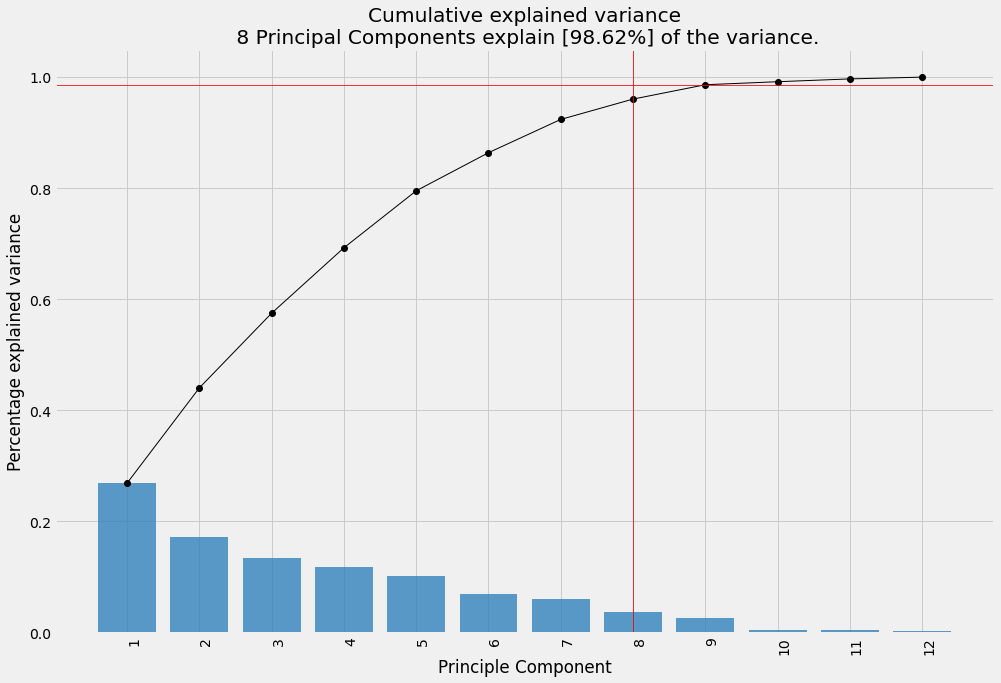

<Figure size 432x288 with 0 Axes>

In [49]:
model.plot()

plt.savefig('pca1.eps', format='eps')

# **Feature Importance**

Feature: 0, Score: 0.19600
Feature: 1, Score: 0.10096
Feature: 2, Score: 0.02443
Feature: 3, Score: 0.05521
Feature: 4, Score: 0.14132
Feature: 5, Score: 0.02339
Feature: 6, Score: 0.01945
Feature: 7, Score: 0.01398
Feature: 8, Score: 0.00499
Feature: 9, Score: 0.01925
Feature: 10, Score: 0.02099
Feature: 11, Score: 0.36349
Feature: 12, Score: 0.01654


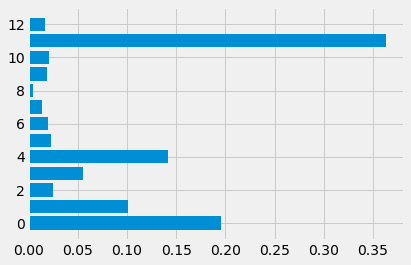

In [50]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=13, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.barh([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.15242
Feature: 1, Score: 0.09074
Feature: 2, Score: 0.04115
Feature: 3, Score: 0.08292
Feature: 4, Score: 0.06731
Feature: 5, Score: 0.05499
Feature: 6, Score: 0.01810
Feature: 7, Score: 0.11692
Feature: 8, Score: 0.02352
Feature: 9, Score: 0.11958
Feature: 10, Score: 0.02314
Feature: 11, Score: 0.14847
Feature: 12, Score: 0.06076


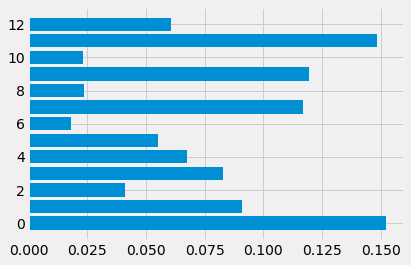

In [51]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=13, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.barh([x for x in range(len(importance))], importance)
pyplot.show()

# **Feature Engineering**

Creating a new column tigger by adding slope , flow and self

In [52]:
LS_df['trigger'] = LS_df['Slope'] + LS_df['Flow']+1

In [53]:
LS_df['time'] = LS_df.apply(lambda x: ['morning','night'] if x['Landslide'] < 15 else x['Earthquake'],axis=1)

In [54]:
#displaying only the morning,night time
LS_df[LS_df.Landslide>0]

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,trigger,time
606,1,1,3,2,2,5,1,4,2,3,5,3,3,9,"[morning, night]"
607,1,1,3,2,2,4,1,4,2,4,5,4,3,8,"[morning, night]"
608,1,3,3,3,3,2,1,3,3,3,5,3,3,6,"[morning, night]"
609,1,1,3,3,2,4,1,2,4,3,5,2,5,10,"[morning, night]"
610,1,5,3,3,2,4,1,2,4,3,5,4,5,10,"[morning, night]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1,4,2,1,4,2,5,1,5,3,2,4,2,5,"[morning, night]"
1208,1,4,5,1,5,3,5,1,5,5,2,1,5,9,"[morning, night]"
1209,1,3,4,1,5,2,5,2,3,3,2,2,5,8,"[morning, night]"
1210,1,2,2,1,3,1,1,5,1,1,1,3,3,5,"[morning, night]"


In [55]:
LS_df['landslide_size'] = LS_df.groupby('Curvature')['Flow'].transform(max) - LS_df.Curvature +1 

In [56]:
LS_df.shape
LS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Landslide       1212 non-null   int64 
 1   Aspect          1212 non-null   int64 
 2   Curvature       1212 non-null   int64 
 3   Earthquake      1212 non-null   int64 
 4   Elevation       1212 non-null   int64 
 5   Flow            1212 non-null   int64 
 6   Lithology       1212 non-null   int64 
 7   NDVI            1212 non-null   int64 
 8   NDWI            1212 non-null   int64 
 9   Plan            1212 non-null   int64 
 10  Precipitation   1212 non-null   int64 
 11  Profile         1212 non-null   int64 
 12  Slope           1212 non-null   int64 
 13  trigger         1212 non-null   int64 
 14  time            1212 non-null   object
 15  landslide_size  1212 non-null   int64 
dtypes: int64(15), object(1)
memory usage: 151.6+ KB


In [57]:
LS_df['time']= pd.cut(LS_df['Landslide'] , 4).cat.codes
LS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Landslide       1212 non-null   int64
 1   Aspect          1212 non-null   int64
 2   Curvature       1212 non-null   int64
 3   Earthquake      1212 non-null   int64
 4   Elevation       1212 non-null   int64
 5   Flow            1212 non-null   int64
 6   Lithology       1212 non-null   int64
 7   NDVI            1212 non-null   int64
 8   NDWI            1212 non-null   int64
 9   Plan            1212 non-null   int64
 10  Precipitation   1212 non-null   int64
 11  Profile         1212 non-null   int64
 12  Slope           1212 non-null   int64
 13  trigger         1212 non-null   int64
 14  time            1212 non-null   int8 
 15  landslide_size  1212 non-null   int64
dtypes: int64(15), int8(1)
memory usage: 143.3 KB


In [58]:
LS_df1 = LS_df.drop(['Profile','trigger', 'time','landslide_size'], axis=1, inplace=True)

In [59]:
#creat dataset in features and target variable
feature_columns = [ 'Precipitation','Flow', 'Earthquake','Aspect' ,'Lithology','Plan','NDWI' ,'Slope' ,'Curvature','Elevation','NDVI']
X = LS_df[feature_columns] # training Features (Predectors)
y = LS_df['Landslide']     # Target variable
X

,Precipitation,Flow,Earthquake,Aspect,Lithology,Plan,NDWI,Slope,Curvature,Elevation,NDVI
0,3,2,2,3,1,2,2,2,3,2,4
1,5,1,2,1,1,5,2,2,5,3,4
2,5,2,3,3,4,4,2,2,4,2,3
3,5,5,3,1,1,3,4,3,3,3,2
4,3,4,2,5,1,3,4,4,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...
1207,2,2,1,4,5,3,5,2,2,4,1
1208,2,3,1,4,5,5,5,5,5,5,1
1209,2,2,1,3,5,3,3,5,4,5,2
1210,1,1,1,2,1,1,1,3,2,3,5


In [60]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1207    1
1208    1
1209    1
1210    1
1211    1
Name: Landslide, Length: 1212, dtype: int64

# **Modelling**

**1)Decision-Tree & Random-forest Classifier**

In [61]:
X = LS_df.iloc[:,1:12]
y = LS_df.Landslide
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = LS_df.Landslide, random_state=0)

from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(
    max_depth=4, criterion='gini', random_state=200)
clf_dt.fit(X_train, y_train)
dt_pred = clf_dt.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_test,dt_pred)
print("Accuracy: {}".format(accuracy_dt))

from sklearn.metrics import precision_score
precision_dt=precision_score(y_test,dt_pred)
print("Precision: {}".format(precision_dt))

from sklearn.metrics import recall_score
recall_dt = recall_score(y_test,dt_pred)
print("Recall: {}".format(recall_dt))



#classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_pred))

Accuracy: 0.7062706270627063
Precision: 0.6648936170212766
Recall: 0.8278145695364238
              precision    recall  f1-score   support

           0       0.77      0.59      0.67       152
           1       0.66      0.83      0.74       151

    accuracy                           0.71       303
   macro avg       0.72      0.71      0.70       303
weighted avg       0.72      0.71      0.70       303



 Random forest

In [63]:
xtrain, xtest, ytrain, ytest =  train_test_split(X, y, test_size=0.3,random_state=100, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=350)
clf_rf.fit(xtrain, ytrain)
rf_pred = clf_rf.predict(xtest)

(848, 11) (848,)
(364, 11) (364,)


In [64]:
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(ytest,rf_pred)
print("Accuracy: {}".format(accuracy_dt))

from sklearn.metrics import precision_score
precision_dt=precision_score(ytest,rf_pred)
print("Precision: {}".format(precision_dt))

from sklearn.metrics import recall_score
recall_dt = recall_score(ytest,rf_pred)
print("Recall: {}".format(recall_dt))

Accuracy: 0.782967032967033
Precision: 0.8
Recall: 0.7608695652173914


In [65]:
from sklearn.metrics import classification_report
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       180
           1       0.80      0.76      0.78       184

    accuracy                           0.78       364
   macro avg       0.78      0.78      0.78       364
weighted avg       0.78      0.78      0.78       364



Confusion_Matrix For Cross_val_predict

Scores: [0.79120879 0.76923077 0.82417582 0.74725275 0.8021978  0.74725275
 0.78021978 0.75824176 0.75824176 0.8       ]
Mean: 0.7778021978021977
Standard Deviation: 0.024757244289081864


<AxesSubplot:>

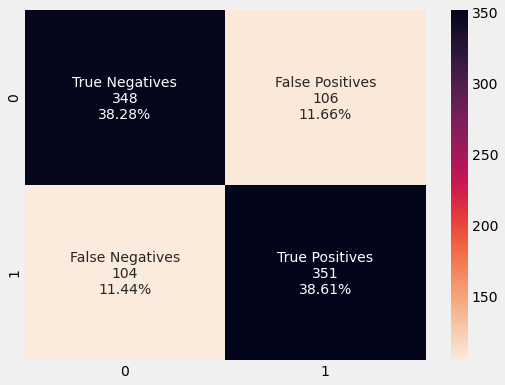

In [66]:
from sklearn.model_selection import cross_val_score
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

from sklearn.model_selection import cross_val_score, cross_val_predict
y_pred_cross_val = cross_val_predict(rfc_cv, X_train, y_train, cv=10)
conf_matrix_cross_val = confusion_matrix(y_train, y_pred_cross_val)

plt.figure(figsize=(8,6))
group_names = ['True Negatives', 'False Positives','False Negatives','True Positives']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix_cross_val.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix_cross_val.flatten()/np.sum(conf_matrix_cross_val)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_cross_val, annot=labels, fmt= '', cmap="rocket_r")

**2)Neural Network & 1-D CNN Classifier**

In [67]:
b = df['Landslide']
a = df.drop(['Landslide', 'Curvature'], axis=1)

# data scaling
from sklearn.preprocessing import StandardScaler ,RobustScaler
standardizer = StandardScaler()
a = standardizer.fit_transform(a)

# Splitting the dataset for training and testing process
X, Xt ,Y, Yt = train_test_split(a, b, test_size=0.30, random_state=30)
print(X.shape)
print(Y.shape)
print(Xt.shape)


(105, 11)
(105,)
(46, 11)


In [68]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,Input,AlphaDropout
#Model Building
n = X.shape[1]
# build a model
model = Sequential()
model.add(Input(shape=(n, )))
model.add(Dense(512, activation='relu')) # Add an input shape! (features,)
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6144      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1

2022-02-26 18:23:27.672839: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [69]:
from keras.callbacks import EarlyStopping
# early stopping callback (model training)
# This callback will stop the training when there is no improvement in 
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
# the validation loss for 10 consecutive epochs. 
lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=10, verbose=1)
es = EarlyStopping(monitor='val_loss', 
                                   mode='min', # don't minimize the accuracy!
                                   patience=35,
                                   restore_best_weights=True,verbose=1)

# now we just update our model fit call
history = model.fit(X,
                    Y,
                    callbacks=[lr,es],
                    epochs=150, # you can set this to a big number!
                    batch_size=25,
                    validation_split=0.1,
                    shuffle=True,
                    verbose=1)

2022-02-26 18:23:28.627809: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
4/4 [==============================] - 1s 90ms/step - loss: 0.6349 - accuracy: 0.6277 - val_loss: 0.4976 - val_accuracy: 1.0000
Epoch 2/150
4/4 [==============================] - 0s 17ms/step - loss: 0.3946 - accuracy: 0.9681 - val_loss: 0.2756 - val_accuracy: 1.0000
Epoch 3/150
4/4 [==============================] - 0s 17ms/step - loss: 0.1706 - accuracy: 1.0000 - val_loss: 0.0906 - val_accuracy: 1.0000
Epoch 4/150
4/4 [==============================] - 0s 16ms/step - loss: 0.0604 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 5/150
4/4 [==============================] - 0s 15ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 6/150
4/4 [==============================] - 0s 16ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 5.0023e-04 - val_accuracy: 1.0000
Epoch 7/150
4/4 [==============================] - 0s 16ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.2394e-04 - val_accuracy: 1.0000
Epoch 8/150


2/2 [==============================] - 0s 6ms/step - loss: 7.3760e-06 - accuracy: 1.0000


Text(0, 0.5, 'Loss')

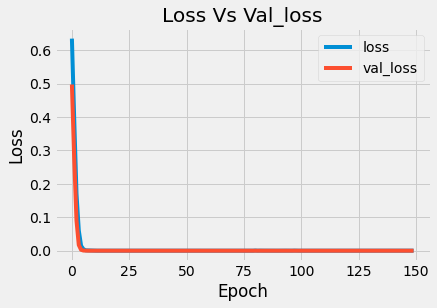

In [70]:
#Evaluation on Test data
result = model.evaluate(Xt, Yt, batch_size=32)

#Plotting Loss and Validation-Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.title('Loss Vs Val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

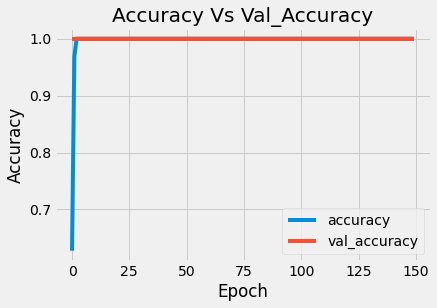

In [71]:
#Plotting Accuracy and Validation-Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.title('Accuracy Vs Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


In [72]:
#Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1? 
model.predict(Xt) # prob of successes (survival)
np.round(model.predict(Xt),0) # 1 and 0 (survival or not)
Y # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(Xt),0)

# confusion matrix
print(confusion_matrix(Yt, preds)) # order matters! (actual, predicted)

## array([[490,  59],   ([[TN, FP],
##       [105, 235]])     [Fn, TP]])
import sklearn.metrics as metrics
print(classification_report(Yt, preds))
print(metrics.recall_score(Yt, preds))

print(metrics.precision_score(Yt, preds))




[[46]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

0.0
0.0


**3)GBM &LIGHTGBM Classifier**

In [73]:
feature_columns = [ 'Precipitation','Flow', 'Earthquake','Aspect' ,'Lithology','Plan','NDWI' ,'Slope' ,'Curvature','Elevation','NDVI']
df1 = LS_df[feature_columns] # training Features (Predectors)
y = LS_df['Landslide']     # Target variable
df1
y
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2)

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV

In [75]:
baseline_gbm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, 
                                          min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline_gbm.fit(X_train,y_train)
predictors_gbm=list(X_train)
# feat_imp_gbm = pd.Series(baseline_gbm.feature_importances_, predictors_gbm).sort_values(ascending=False)
# feat_imp_gbm.plot(kind='bar', title='Importance of Features Using GBM')
# plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline_gbm.score(X_test, y_test)))
pred_gbm=baseline_gbm.predict(X_test)
print(classification_report(y_test, pred_gbm))

Accuracy of the GBM on test set: 0.782
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       115
           1       0.80      0.78      0.79       128

    accuracy                           0.78       243
   macro avg       0.78      0.78      0.78       243
weighted avg       0.78      0.78      0.78       243



In [76]:
baseline_lgbm = LGBMClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, 
                          #min_samples_split=2, 
                          min_samples_leaf=1, subsample=1,
                          #max_features='sqrt', 
                          random_state=10)
baseline_lgbm.fit(X_train,y_train)
predictors_lgbm=list(X_train)
# feat_imp_lgbm = pd.Series(baseline_lgbm.feature_importances_, predictors_lgbm).sort_values(ascending=False)
# feat_imp_lgbm.plot(kind='bar', title='Importance of Features Using LGBM')
# plt.ylabel('Feature Importance Score')
print('Accuracy of the LGBM on test set: {:.3f}'.format(baseline_lgbm.score(X_test, y_test)))
pred_lgbm=baseline_lgbm.predict(X_test)
print(classification_report(y_test, pred_lgbm))

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
Accuracy of the LGBM on test set: 0.790
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       115
           1       0.80      0.80      0.80       128

    accuracy                           0.79       243
   macro avg       0.79      0.79      0.79       243
weighted avg       0.79      0.79      0.79       243



Tuning of Models

In [77]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[50,100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, 
                                                            subsample=1,max_features='sqrt', random_state=10), 
                                                            param_grid = p_test3, scoring='accuracy',n_jobs=4,
                                                            iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
learning_rate_gbm = tuning.best_params_.get("learning_rate")
n_estimators_gbm = tuning.best_params_.get("n_estimators")

In [78]:
p_test3a = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[50,100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =LGBMClassifier(max_depth=4, min_samples_leaf=1, 
                                                subsample=1, random_state=10), 
                                                param_grid = p_test3a, scoring='accuracy',n_jobs=4,
                                                iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
learning_rate_lgbm = tuning.best_params_.get("learning_rate")
n_estimators_lgbm = tuning.best_params_.get("n_estimators")

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[Light

max_depth

In [79]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm,n_estimators=n_estimators_gbm,
                                                            min_samples_split=2, 
                                                            min_samples_leaf=1, subsample=1,max_features='sqrt',
                                                            random_state=10), 
                                                            param_grid = p_test2, scoring='accuracy',n_jobs=4,
                                                            iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
max_depth_gbm = tuning.best_params_.get("max_depth")

In [80]:
p_test2a = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =LGBMClassifier(learning_rate=learning_rate_lgbm,n_estimators=n_estimators_lgbm, 
                                                min_samples_leaf=1, subsample=1, random_state=10), 
                                                param_grid = p_test2, scoring='accuracy',n_jobs=4,
                                                iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
max_depth_lgbm = tuning.best_params_.get("max_depth")

In [81]:
#First Evaluation of New Model on Test Set
model1 = GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,max_depth=max_depth_gbm, 
                                    min_samples_split=2, 
                                    min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)
predictors=list(X_train)
# feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
# feat_imp.plot(kind='bar', title='Importance of Features')
# plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.786
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       115
           1       0.81      0.77      0.79       128

    accuracy                           0.79       243
   macro avg       0.79      0.79      0.79       243
weighted avg       0.79      0.79      0.79       243



In [82]:
model1_lgbm = LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,max_depth=max_depth_lgbm,  
                             min_samples_leaf=1, subsample=1, random_state=10)
model1_lgbm.fit(X_train,y_train)
predictors=list(X_train)
# feat_imp = pd.Series(model1_lgbm.feature_importances_, predictors).sort_values(ascending=False)
# feat_imp.plot(kind='bar', title='Importance of Features')
# plt.ylabel('Feature Importance Score')
print('Accuracy of the LGBM on test set: {:.3f}'.format(model1_lgbm.score(X_test, y_test)))
pred=model1_lgbm.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the LGBM on test set: 0.790
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       115
           1       0.81      0.79      0.80       128

    accuracy                           0.79       243
   macro avg       0.79      0.79      0.79       243
weighted avg       0.79      0.79      0.79       243



In [83]:
#Min Sample Split and Min Samples Leaf
p_test4 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                                                            max_depth=max_depth_gbm, 
                                                            subsample=1,max_features='sqrt', random_state=10), 
                                                            param_grid = p_test4, scoring='accuracy',n_jobs=4,
                                                            iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
min_samples_leaf_gbm = tuning.best_params_.get("min_samples_leaf")

p_test4a = {'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,
                                                max_depth=max_depth_lgbm, 
                                                subsample=1, random_state=10), 
                                                param_grid = p_test4a, scoring='accuracy',n_jobs=4,
                                                iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
min_samples_leaf_lgbm = tuning.best_params_.get("min_samples_leaf")



[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1


In [84]:
#Max Features
p_test5 = {'max_features':[2,3,4,5,6,7]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                                                            max_depth=max_depth_gbm, 
                                                            min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm, 
                                                            subsample=1, 
                                                            random_state=10), param_grid = p_test5, scoring='accuracy',
                                                            n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
max_features_gbm = tuning.best_params_.get("max_features")

#Subsample
p_test6= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                                                            max_depth=max_depth_gbm, 
                                                            min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                                                            max_features=max_features_gbm , 
                                                            random_state=10), param_grid = p_test6, scoring='accuracy',
                                                            n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
subsample_gbm = tuning.best_params_.get("subsample")

p_test6a= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,
                                                max_depth=max_depth_lgbm, 
                                                min_samples_leaf=min_samples_leaf_lgbm,
                                                random_state=10), param_grid = p_test6, scoring='accuracy',
                                                n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
subsample_lgbm = tuning.best_params_.get("subsample")



In [85]:
#random_state
p_test7= {'random_state':list(range(0,101,2))}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                                                            max_depth=max_depth_gbm, 
                                                            min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                                                            max_features=max_features_gbm , 
                                                            subsample=subsample_gbm), param_grid = p_test7, 
                                                            scoring='accuracy',
                                                            n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
random_state_gbm = tuning.best_params_.get("random_state")


p_test7a= {'random_state':list(range(0,101,2))}

tuning = GridSearchCV(estimator =LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,
                                                max_depth=max_depth_lgbm, min_samples_leaf=min_samples_leaf_lgbm, 
                                                subsample=subsample_lgbm), param_grid = p_test7a, scoring='accuracy',
                                                n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
random_state_lgbm = tuning.best_params_.get("random_state")






[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[Ligh

In [86]:
#Optimal Parameters
a1 = []
a2 = []
a3 = []
a4 = []
a5 = []
a6 = []
a7 = []
a8 = []


a1.append('GBM')
a2.append(learning_rate_gbm)
a3.append(n_estimators_gbm)
a4.append(max_depth_gbm)
a5.append(min_samples_leaf_gbm)
a6.append(max_features_gbm)
a7.append(subsample_gbm)
a8.append(random_state_gbm)
opt_par = pd.DataFrame({'Name': a1, 'learning_rate': a2, 'n_estimators': a3,
                         'max_depth': a4, 'min_samples_leaf': a5, 'max_features': a6,
                         'subsample_gbm': a7, 'random_state': a8})

a1.append('LGBM')
a2.append(learning_rate_lgbm)
a3.append(n_estimators_lgbm)
a4.append(max_depth_lgbm)
a5.append(min_samples_leaf_lgbm)
a6.append('--')
a7.append(subsample_lgbm)
a8.append(random_state_lgbm)

opt_par = pd.DataFrame({'Name': a1, 'learning_rate': a2, 'n_estimators': a3,
                         'max_depth': a4, 'min_samples_leaf': a5, 'max_features': a6,
                         'subsample_gbm': a7, 'random_state': a8})

opt_par



,Name,learning_rate,n_estimators,max_depth,min_samples_leaf,max_features,subsample_gbm,random_state
0,GBM,0.010,750,4,3,6,0.85,70
1,LGBM,0.005,1500,4,1,--,0.70,0


In [87]:
#Evaluation of Final Model on Test Set
new=GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                               max_depth=max_depth_gbm, min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                               max_features=max_features_gbm, subsample=subsample_gbm, random_state=random_state_gbm)
new.fit(X_train,y_train)
predictors=list(X_train)
# feat_imp = pd.Series(new.feature_importances_, predictors).sort_values(ascending=False)
# feat_imp.plot(kind='bar', title='Importance of Features')
# plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(new.score(X_test, y_test)))
pred=new.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.778
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       115
           1       0.80      0.77      0.79       128

    accuracy                           0.78       243
   macro avg       0.78      0.78      0.78       243
weighted avg       0.78      0.78      0.78       243



In [88]:
new_lgbm=LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,max_depth=max_depth_lgbm,
                        min_samples_leaf=min_samples_leaf_lgbm, subsample=subsample_lgbm, random_state=random_state_lgbm)
new_lgbm.fit(X_train,y_train)
predictors=list(X_train)
# feat_imp = pd.Series(new_lgbm.feature_importances_, predictors).sort_values(ascending=False)
# feat_imp.plot(kind='bar', title='Importance of Features')
# plt.ylabel('Feature Importance Score')
print('Accuracy of the LGBM on test set: {:.3f}'.format(new_lgbm.score(X_test, y_test)))
pred=new_lgbm.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the LGBM on test set: 0.790
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       115
           1       0.81      0.79      0.80       128

    accuracy                           0.79       243
   macro avg       0.79      0.79      0.79       243
weighted avg       0.79      0.79      0.79       243



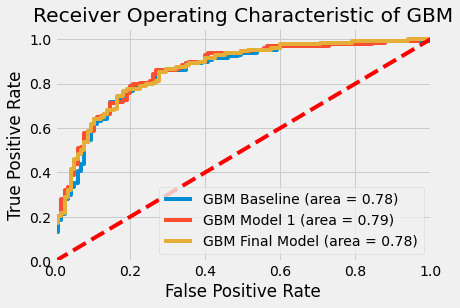

<Figure size 432x288 with 0 Axes>

In [89]:
#Comparison of ROC AUC
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 


#run models
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, 
                                      min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)

model1 = GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,max_depth=max_depth_gbm, 
                                    min_samples_split=2, 
                                    min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)

new=GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                               max_depth=max_depth_gbm, min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                               max_features=max_features_gbm, subsample=subsample_gbm, random_state=random_state_gbm)
new.fit(X_train,y_train)

#calculate values for ROC AUC plot
#baseline model
baseline_roc_auc = roc_auc_score(y_test, baseline.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, baseline.predict_proba(X_test)[:,1])
#model 1
model1_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#new tuned model 
new_roc_auc = roc_auc_score(y_test, new.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, new.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fprB, tprB, label='GBM Baseline (area = %0.2f)' % baseline_roc_auc)
plt.plot(fpr1, tpr1, label='GBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, label='GBM Final Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of GBM')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

plt.savefig('roc1.eps', format='eps')

Accuracy of the GBM on test set for Baseline Model: 0.782
Accuracy of the GBM on test set for Model1: 0.786
Accuracy of the GBM on test set for New Model: 0.778
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1


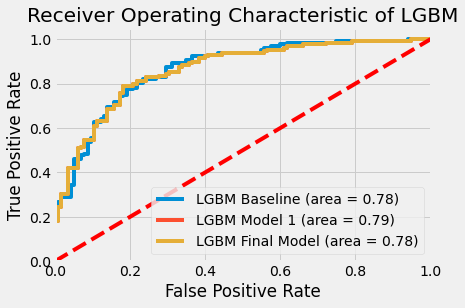

<Figure size 432x288 with 0 Axes>

In [90]:
print('Accuracy of the GBM on test set for Baseline Model: {:.3f}'.format(baseline.score(X_test, y_test)))
print('Accuracy of the GBM on test set for Model1: {:.3f}'.format(model1.score(X_test, y_test)))
print('Accuracy of the GBM on test set for New Model: {:.3f}'.format(new.score(X_test, y_test)))

#run models
baseline_lgbm = LGBMClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, 
                               min_samples_leaf=1, subsample=1, random_state=10)
baseline_lgbm.fit(X_train,y_train)

model1_lgbm = LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,max_depth=max_depth_lgbm,  
                             min_samples_leaf=1, subsample=1, random_state=10)
model1_lgbm.fit(X_train,y_train)

new_lgbm=LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,max_depth=max_depth_lgbm,
                        min_samples_leaf=min_samples_leaf_lgbm, subsample=subsample_lgbm, random_state=random_state_lgbm)
new_lgbm.fit(X_train,y_train)

#calculate values for ROC AUC plot
#baseline model
baseline_lgbm_roc_auc = roc_auc_score(y_test, baseline_lgbm.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, baseline_lgbm.predict_proba(X_test)[:,1])
#model 1
model1_lgbm_roc_auc = roc_auc_score(y_test, model1_lgbm.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1_lgbm.predict_proba(X_test)[:,1])
#new tuned model 
new_lgbm_roc_auc = roc_auc_score(y_test, new_lgbm.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, new_lgbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fprB, tprB, label='LGBM Baseline (area = %0.2f)' % baseline_roc_auc)
plt.plot(fpr1, tpr1, label='LGBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, label='LGBM Final Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of LGBM')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

plt.savefig('roc2.eps', format='eps')

**4)XGBOST & CATBOST Classifier**

In [91]:
import xgboost as xgb
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score

#define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [92]:
b = df['Landslide']
a = df.drop(['Landslide', 'Curvature'], axis=1)

# data scaling
from sklearn.preprocessing import StandardScaler ,RobustScaler
standardizer = StandardScaler()
a = standardizer.fit_transform(a)


test_size = 0.33

X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=test_size, random_state=50 , stratify =b)

In [93]:
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 6,
            'alpha': 10,
            'learning_rate': 0.05,
            'n_estimators':200
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

[18:31:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
print(xgb_clf)


# make predictions on test data

y_pred = xgb_clf.predict(X_test)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [95]:
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 1.0000


In [96]:
clf_xgBoost = xgb.XGBClassifier(
   seed= 7,
objective = 'binary:logistic',
    learning_rate = 0.03
)
clf_xgBoost.fit(X_train, y_train, early_stopping_rounds=15,
               eval_metric= 'auc',eval_set =[(X_test ,y_test)] ,verbose=0 )

[18:31:48] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:48] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:48] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:48] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:48] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:48] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:48] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:48] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:48] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:48] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:48] WARNING: 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.03, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=7,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=7,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [97]:
from sklearn import metrics
expected_y  = y_test
predicted_y = clf_xgBoost.predict(X_test)

print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[50]]


In [98]:
clfxgBoost = xgb.XGBClassifier(
   base_score=0.5, booster='gbtree',
              gamma=0, learning_rate=0.1, max_depth= 6,
              monotone_constraints='()', n_estimators= 200,
    num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=7,
              subsample=1, tree_method='exact', validate_parameters=1,
              
)
clfxgBoost.fit(X_train, y_train, verbose = 0, early_stopping_rounds=15,
               eval_metric= 'auc',eval_set =[(X_test ,y_test)] )

[18:31:50] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:50] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:50] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:50] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:50] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:50] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:50] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:50] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:50] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:50] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[18:31:50] WARNING: 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=7,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

# **Compare Classifier Models Accuracy**

In [99]:
#creat dataset in features and target variable
feature_columns = ['Flow', 'Earthquake','Aspect' ,'Lithology','Plan','NDWI' ,'Slope' ,'Curvature','Elevation','NDVI']
X = LS_df[feature_columns] # training Features (Predectors)
y = LS_df['Landslide']     # Target variable
X
y

0       0
1       0
2       0
3       0
4       0
       ..
1207    1
1208    1
1209    1
1210    1
1211    1
Name: Landslide, Length: 1212, dtype: int64

In [100]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.20,random_state=20)


In [101]:
#test the accuracy of Decision Tree


decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

73.25


In [102]:
# test the accuracy of Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

80.25


In [103]:
from sklearn.ensemble import GradientBoostingClassifier
# test the accuracy of Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_val)
acc_gbc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbc)

80.66


In [104]:
from catboost import CatBoostClassifier, cv, Pool

clf =CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=2)
clf.fit(X_train,y_train, eval_set=(X_val,y_val), early_stopping_rounds=100,verbose=False)
#,cat_features=cate_features_index,
y_pred = clf.predict(X_val)
acc_clf = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_clf)

82.3


In [105]:
 #Let's compare the accuracies of each model

models = pd.DataFrame({
    'Model': [ 'Random Forest', 'Decision Tree',  'Gradient Boosting Classifier','Cat Boost Classifier'],
    'Accuracy': [ acc_randomforest, acc_decisiontree, acc_gbc, acc_clf]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Cat Boost Classifier,82.30
2,Gradient Boosting Classifier,80.66
0,Random Forest,80.25
1,Decision Tree,73.25
